## Qualitative assesment analysis

In [1]:
##Reproducing the qualitative assesment scores

In [2]:
#importing libraries

import os,re,textwrap
import pandas as pd
import numpy as np
from scipy.stats import iqr

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



In [3]:
#open data

main_path = r".\data"
columns_list = ['Name','Speciality','Score']
template = pd.DataFrame(data=None,columns = columns_list)

for file in os.listdir(main_path):
    temp_file = pd.read_excel(os.path.join(main_path,file))
    template = template.append(pd.Series([temp_file.Participant[0],temp_file.Speciality[0],np.sum(temp_file.Dl_score)/len(temp_file.Dl_score)],index = columns_list),ignore_index=True)



C:\Users\s.primakov\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


Average median = 55.0, IQR 12%


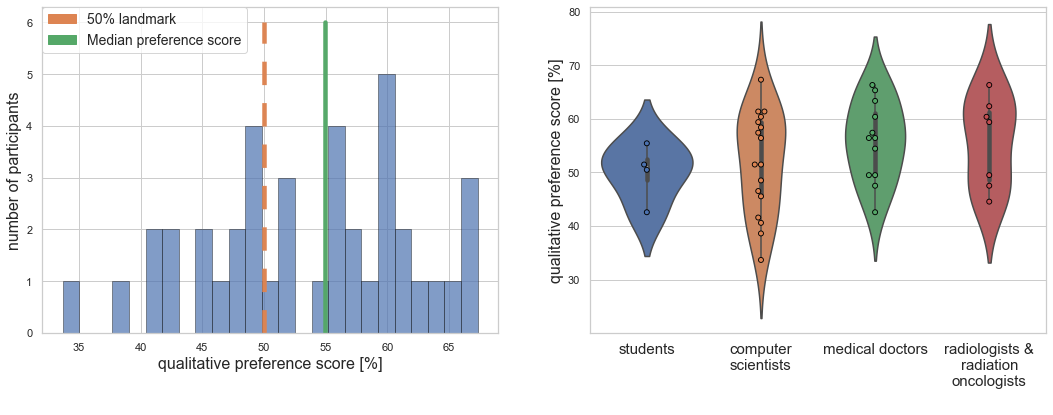

In [4]:
#Initialize color theme
sns.set(context='notebook', style='whitegrid')

#Making dictionaries for visualization
sorted_keys, sorted_vals = (('students','computer scientists','medical doctors','radiologists &   radiation oncologists'),([*template.Score[template.Speciality=='Student']*100],[*template.Score[template.Speciality=='Computer scientist']*100],
                                                            [*template.Score[template.Speciality=='Medical Doctor']*100],
                                                            [*template.Score[template.Speciality=='Radiologist']*100]+[*template.Score[template.Speciality=='Radiation oncologist']*100]))

#vizualising
my_pal = {0:sns.color_palette()[0],1:sns.color_palette()[1],2:sns.color_palette()[2]}

plt.figure(figsize=(18,6))

#set color for DL
plt.subplot(121)
plt.hist(template.Score*100,bins=25, edgecolor='black', linewidth=0.55,alpha=0.7)#,color=my_pal[0])
plt.plot([np.median(template.Score)*100,np.median(template.Score)*100], [0,6],color=my_pal[2],alpha=0.99,linewidth=4.5)
plt.plot([50,50], [0,6],color=my_pal[1],alpha=0.99,dashes=[5.2, 4],linewidth=4.5)
sns.utils.axlabel(xlabel='qualitative preference score [%]', ylabel='number of participants', fontsize=16)
patch_50 = mpatches.Patch(color=my_pal[1], label='50% landmark')
patch_m = mpatches.Patch(color=my_pal[2], label='Median preference score')
plt.legend(handles=[patch_50,patch_m],borderaxespad=0.,loc=2, fontsize=14)

plt.subplot(122)
my_pal = {0:sns.color_palette()[0],1:sns.color_palette()[1],2:sns.color_palette()[2],3:sns.color_palette()[3]}
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel=' ', ylabel='qualitative preference score [%]', fontsize=16)
ax = sns.violinplot(data=sorted_vals,inner ='box',dodge=True,palette=my_pal)
sns.swarmplot(data=sorted_vals, size=5, edgecolor="black", linewidth=.9,palette=my_pal)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(plt.xticks()[0], sorted_keys,fontsize=15)
ax.set_xticklabels(textwrap.fill(x.get_text(), 17) for x in ax.get_xticklabels())


print('Average median = %s, IQR %s'%(np.round(np.median(template.Score)*100,0),int(iqr(template.Score*100)))+'%')



In [5]:
##Scores across groups
names = ['Students','Computer scientists','Medical Doctors', 'Radiologists & Radiation onc.']
for i in range(4):
    print('Median score for %s : %s, iqr: %s'%(names[i],np.median(sorted_vals[i]),iqr(sorted_vals[i])))

Median score for Students : 50.99009900990099, iqr: 3.960396039603964
Median score for Computer scientists : 51.48514851485149, iqr: 13.861386138613852
Median score for Medical Doctors : 56.43564356435643, iqr: 11.633663366336634
Median score for Radiologists & Radiation onc. : 59.4059405940594, iqr: 12.87128712871288
